<a href="https://colab.research.google.com/github/gjrkdgh0772/Finance/blob/main/lec06_hedge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<font size=6><b>Lec06. 헷지(Hedge) &  상관분석(Corr.)

* <b>포트폴리오(Portfolio)</b><br>
위험을 줄이고", "투자수익을 극대화" 하기 위한 일환으로 여러 종목에 분산 투자하는 방법 
* High Risk, High Return : 위험을 부담할수록 더 높은 수익 가능 분산투자 : 단순히 여러 종목을 사는 것이 아니라 위험을 분산(상관관계 0) 다양한 자산군( '국내 주식', '해외 주식', '달러', '금', '채권', '부동산' 등)에 자본은 분배하여 포트폴리오 구성

* <b>위험의 헷지(Hedge)</b><br>
'포트폴리오'라 함은 서로 음의 상관관계를 가진 종목들로 구성하여 어떤 종목이 떨어질 때 다른 종목은 상승하여 그 손실을 줄이는 데에 목적
* 음의 상관관계를 가진 자산들을 함께 운용해 나가면서 위험을 최소화 하고, 위험이 최소화된 상태에서의 수익률을 극대화 하는 것

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

import warnings
warnings.filterwarnings(action='ignore')

#-------------------- 차트 관련 속성 (한글처리, 그리드) -----------
#plt.rc('font', family='NanumGothicOTF') # For MacOS
plt.rcParams['font.family']= 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False
sns.set()

#-------------------- 주피터 , 출력결과 넓이 늘리기 ---------------
from IPython.core.display import display, HTML
display(HTML("<style>.container{width:100% !important;}</style>"))
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
pd.set_option('max_colwidth', None)


# Data Load

<pre>
Nasdaq(SPY) : https://kr.investing.com/indices/nq-100	
S&P500(GSPC) : https://kr.investing.com/indices/us-spx-500
Dow_J.(DJI) : https://kr.investing.com/indices/us-30-historical-data
SBond(SHY) : https://kr.investing.com/etfs/spdr-s-p-500	
                 : https://www.ishares.com/us/products/239452/ishares-13-year-treasury-bond-etf
GBond(TLT) : https://kr.investing.com/etfs/ishares-lehman-20-year-treas-historical-data
                 : https://www.ishares.com/us/products/239454/ishares-20-year-treasury-bond-etf
KOSPI(KS11) : https://kr.investing.com/indices/kospi		
GLD : https://kr.investing.com/etfs/spdr-gold-trust-historical-data
EX_US: https://kr.investing.com/currencies/usd-krw-historical-data	


* DJI <br>
3M (NYSE : MMM) American Express (NYSE : AXP) Amgen (NASDAQ : AMGN) Apple (NASDAQ : AAPL) 보잉 (NYSE : BA) Caterpillar (NYSE : CAT) Chevron (NYSE : CVX) Cisco Systems (NASDAQ : CSCO) 코카콜라 (NYSE : KO) 디즈니 (NYSE : DIS) 다우 (NYSE : DOW) Goldman Sachs (NYSE : GS) Home Depot (NYSE : HD) Honeywell International (NYSE : HON) IBM (NYSE : IBM) Intel (NASDAQ : INTC) Johnson & Johnson (NYSE : JNJ) JPMorgan Chase (NYSE : JPM) 맥도날드 (NYSE : MCD) Merck (NYSE : MRK) Microsoft (NASDAQ : MSFT) 나이키 (NYSE : NKE) Procter & Gamble (NYSE : PG) Salesforce (NYSE : CRM) 여행자 (NYSE : TRV) UnitedHealth Group (NYSE : UNH) Verizon (NYSE : VZ) 비자 (NYSE : V) Walmart (NYSE : WMT) Walgreens Boots Alliance (NASDAQ : WBA)

In [ ]:
DJ = pd.read_csv("./dataset/lec06_index_dataset/DJ.csv", thousands=",")
print(DJ.shape)
print(DJ.info())
DJ.head()

(590, 7)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 590 entries, 0 to 589
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   날짜      590 non-null    object 
 1   종가      590 non-null    float64
 2   오픈      590 non-null    float64
 3   고가      590 non-null    float64
 4   저가      590 non-null    float64
 5   거래량     590 non-null    object 
 6   변동 %    590 non-null    object 
dtypes: float64(4), object(3)
memory usage: 32.4+ KB
None


,날짜,종가,오픈,고가,저가,거래량,변동 %
0,2022년 3월,34707.15,33813.48,34876.87,32578.73,-,2.44%
1,2022년 2월,33879.55,35151.47,35824.28,32284.35,2.50B,-3.56%
2,2022년 1월,35131.86,36321.59,36952.65,33150.33,8.90B,-3.32%
3,2021년 12월,36338.30,34678.94,36679.44,34006.98,8.41B,5.38%
4,2021년 11월,34483.72,35833.65,36565.73,34424.44,7.23B,-3.73%


## 거래량 
* K M B 처리
* K(kilo)1,000 M(million)1,000,000 B(billion)1,000,000,000

In [ ]:
def alphabet_handling(x):
    res = 0
    if 'B' in x:
        res = float(x[:-1])*1000000000
    elif 'K' in x:
        res = float(x[:-1])*1000
    elif 'M' in x:
        res = float(x[:-1])*1000000
    else:
        res = 0 
    return res
DJ['거래량']=DJ['거래량'].apply(lambda x : alphabet_handling(x))
DJ.head()

,날짜,종가,오픈,고가,저가,거래량,변동 %
0,2022년 3월,34707.15,33813.48,34876.87,32578.73,0.000000e+00,2.44%
1,2022년 2월,33879.55,35151.47,35824.28,32284.35,2.500000e+09,-3.56%
2,2022년 1월,35131.86,36321.59,36952.65,33150.33,8.900000e+09,-3.32%
3,2021년 12월,36338.30,34678.94,36679.44,34006.98,8.410000e+09,5.38%
4,2021년 11월,34483.72,35833.65,36565.73,34424.44,7.230000e+09,-3.73%


## 변동 %

In [ ]:
DJ = DJ.rename({"변동 %":"변동률"}, axis=1)
DJ['변동률'] = DJ['변동률'].str.replace("%","").astype('float')
DJ.head()

,날짜,종가,오픈,고가,저가,거래량,변동률
0,2022년 3월,34707.15,33813.48,34876.87,32578.73,0.000000e+00,2.44
1,2022년 2월,33879.55,35151.47,35824.28,32284.35,2.500000e+09,-3.56
2,2022년 1월,35131.86,36321.59,36952.65,33150.33,8.900000e+09,-3.32
3,2021년 12월,36338.30,34678.94,36679.44,34006.98,8.410000e+09,5.38
4,2021년 11월,34483.72,35833.65,36565.73,34424.44,7.230000e+09,-3.73


## 날짜 
* datetime 타입 변경, 인덱스지정, 포맷변환

In [ ]:
DJ['날짜'] = pd.to_datetime(DJ['날짜'], format='%Y년 %m월')  #infer_datetime_format=True)
DJ.set_index("날짜")
DJ.head()

,날짜,종가,오픈,고가,저가,거래량,변동률
0,2022-03-01,34707.15,33813.48,34876.87,32578.73,0.000000e+00,2.44
1,2022-02-01,33879.55,35151.47,35824.28,32284.35,2.500000e+09,-3.56
2,2022-01-01,35131.86,36321.59,36952.65,33150.33,8.900000e+09,-3.32
3,2021-12-01,36338.30,34678.94,36679.44,34006.98,8.410000e+09,5.38
4,2021-11-01,34483.72,35833.65,36565.73,34424.44,7.230000e+09,-3.73


In [ ]:
file_list = os.listdir("./dataset/lec06_index_dataset/")

## 공통함수


In [ ]:
os.listdir("./dataset/lec06_index_dataset/")

['DJ.csv',
 'EXUS.csv',
 'GLD.csv',
 'KOSPI.csv',
 'NASDAQ.csv',
 'S&P500.csv',
 'SHY.csv',
 'SHY2.xls',
 'TLT.csv',
 'TLT2.xls']

In [ ]:
def alphabet_handling(x):
    res = 0
    if 'B' in x:
        res = float(x[:-1])*1000000000
    elif 'K' in x:
        res = float(x[:-1])*1000
    elif 'M' in x:
        res = float(x[:-1])*1000000
    else:
        res = 0 
    return res

file_list = os.listdir("./dataset/lec06_index_dataset/")
for file in file_list:
    try :
        fname = os.path.basename(file).rstrip('.csv')  #DJ.csv  --> DJ
        print(fname)
        # df = eval(fname)
        df = pd.read_csv(f"./dataset/lec06_index_dataset/{fname}.csv", thousands=",")
        
        try :
            df['거래량']=df['거래량'].apply(lambda x : alphabet_handling(x))
        except :
            pass
        
        df = df.rename({"변동 %":"변동률"}, axis=1)
        df['변동률'] = df['변동률'].str.replace("%","").astype('float')

        df['날짜'] = pd.to_datetime(df['날짜'], format='%Y년 %m월')  #infer_datetime_format=True)
        df = df.set_index("날짜")
        globals()[file] = df    #globals()[키=파일이름]=값  DJ = df 
        print(df.tail())
    except :
        continue

DJ
                종가      오픈      고가      저가  거래량   변동률
날짜                                                   
1980-05-01  850.85  817.06  866.13  795.81  0.0  4.14
1980-04-01  817.06  785.75  818.52  751.37  0.0  3.98
1980-03-01  785.75  863.14  868.69  729.95  0.0 -8.97
1980-02-01  863.14  875.84  918.17  847.27  0.0 -1.45
1980-01-01  875.85  838.74  897.88  809.05  0.0  4.42
EXUS
                종가      오픈      고가      저가   변동률
날짜                                              
1981-09-01  681.25  681.25  681.25  681.25 -0.96
1981-08-01  687.85  687.85  687.85  687.85  0.13
1981-07-01  686.95  686.95  686.95  686.95  0.55
1981-06-01  683.20  683.20  683.20  683.20 -0.18
1981-05-01  684.40  684.40  684.40  684.40  0.81
GLD
               종가     오픈     고가     저가         거래량   변동률
날짜                                                      
2005-04-01  43.35  42.60  43.70  42.16  38430000.0  1.24
2005-03-01  42.82  43.30  44.67  42.35  41040000.0 -1.61
2005-02-01  43.52  42.09  43.74  41.02 

In [ ]:
# Namespace 변수, 값
# globals()

In [ ]:
from pandas_datareader import data as pdr
import yfinance as yf
yf.pdr_override()

In [ ]:
INDEX_NAME = ["SPY", "^GSPC", "SHY","^KS11", "TLT", "GLD", "DJI",'USDKRW=X']   #미'USDKRW=X' 일'JPYKRW=X' 영'GBPKRW=X'
# 통합된 날짜 사용할 경우 : 20070801
SDATE = "1980-01-01"
EDATE = "2022-03-25"

dict={}
for index in INDEX_NAME :
    df = pdr.get_data_yahoo(index, start=SDATE)
    dict[index] = df['Adj Close']

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [ ]:
df = pd.DataFrame(dict)
# df.columns =  ["SPY", "GSPC", "SHY","KS11", "TLT", "GLD", "DJI",'USDKRW']
df.columns =  ["NASDAQ", "S&P500", "BOND-S","KOSPI", "BOND-G", "GLD", "DJ",'US-W']

In [ ]:
#df = df.fillna(0)
df = df.dropna(axis=0)
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3947 entries, 2004-11-18 to 2022-03-02
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   NASDAQ  3947 non-null   float64
 1   S&P500  3947 non-null   float64
 2   BOND-S  3947 non-null   float64
 3   KOSPI   3947 non-null   float64
 4   BOND-G  3947 non-null   float64
 5   GLD     3947 non-null   float64
 6   DJ      3947 non-null   float64
 7   US-W    3947 non-null   float64
dtypes: float64(8)
memory usage: 277.5 KB
None


,NASDAQ,S&P500,BOND-S,KOSPI,BOND-G,GLD,DJ,US-W
Date,,,,,,,,
2004-11-18,84.490067,1183.550049,61.854610,875.840027,51.479012,44.380001,10572.500000,1062.000000
2004-11-19,83.550781,1170.339966,61.756161,867.030029,51.068157,44.779999,10456.900391,1054.000000
2004-11-22,83.949272,1177.239990,61.771271,849.989990,51.334377,44.950001,10489.400391,1026.699951
2004-11-23,84.077354,1176.939941,61.763733,860.400024,51.397995,44.750000,10492.599609,1055.000000
2004-11-24,84.276596,1181.760010,61.756161,872.559998,51.397995,45.049999,10520.299805,1066.500000


In [ ]:
df.index.min() , df.index.max()

(Timestamp('2004-11-18 00:00:00'), Timestamp('2022-03-02 00:00:00'))

In [ ]:
df.describe()

,NASDAQ,S&P500,BOND-S,KOSPI,BOND-G,GLD,DJ,US-W
count,3947.000000,3947.000000,3947.000000,3947.000000,3947.000000,3947.000000,3947.000000,3947.000000
mean,169.524558,1925.851205,76.148224,1918.256827,93.073283,115.850613,16865.478364,1103.848892
std,96.834842,901.609561,6.667045,485.633662,30.117076,37.283569,7087.090484,99.567581
min,52.636520,676.530029,61.552372,844.200012,50.022625,41.270000,6547.049805,886.679993
25%,95.869263,1265.799988,74.340652,1647.359985,65.837669,91.130001,11333.200195,1050.350037
50%,129.995773,1552.099976,77.968742,1957.260010,93.379005,119.230003,14296.200195,1116.500000
75%,217.092560,2373.469971,79.644852,2097.020020,112.549278,140.224998,20846.549805,1156.084961
max,476.071014,4793.540039,86.157677,3305.209961,167.615021,193.889999,36799.699219,1571.400024


# 자산별 상관 관계
* 월 종가 기준 자산 별 상관관계
* corr = 1 : 양의 상관관계
* corr = -1 : 음의 상관관계
* corr = 0 : 관계없다

## 지수화
* pct_change(N)
* <font color=red><b> N일 대비 수익률 비교에 주로 사용

In [ ]:
df.head()

,NASDAQ,S&P500,BOND-S,KOSPI,BOND-G,GLD,DJ,US-W
Date,,,,,,,,
2004-11-18,84.490067,1183.550049,61.854610,875.840027,51.479012,44.380001,10572.500000,1062.000000
2004-11-19,83.550781,1170.339966,61.756161,867.030029,51.068157,44.779999,10456.900391,1054.000000
2004-11-22,83.949272,1177.239990,61.771271,849.989990,51.334377,44.950001,10489.400391,1026.699951
2004-11-23,84.077354,1176.939941,61.763733,860.400024,51.397995,44.750000,10492.599609,1055.000000
2004-11-24,84.276596,1181.760010,61.756161,872.559998,51.397995,45.049999,10520.299805,1066.500000


In [ ]:
df_chg = df.pct_change()
df_chg = df_chg.dropna(axis=0)
df_chg.head()

,NASDAQ,S&P500,BOND-S,KOSPI,BOND-G,GLD,DJ,US-W
Date,,,,,,,,
2004-11-19,-0.011117,-0.011161,-0.001592,-0.010059,-0.007981,0.009013,-0.010934,-0.007533
2004-11-22,0.004769,0.005896,0.000245,-0.019653,0.005213,0.003796,0.003108,-0.025901
2004-11-23,0.001526,-0.000255,-0.000122,0.012247,0.001239,-0.004449,0.000305,0.027564
2004-11-24,0.002370,0.004095,-0.000123,0.014133,0.000000,0.006704,0.002640,0.010900
2004-11-26,-0.000760,0.000753,-0.000980,-0.016549,-0.006530,0.005327,0.000181,-0.018097


## heatmap

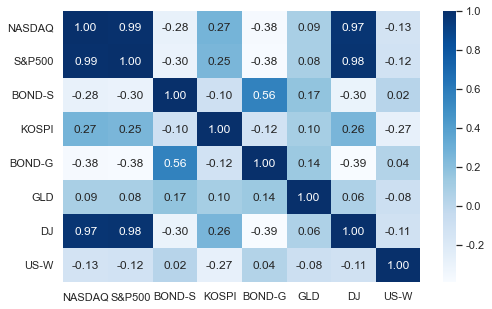

In [ ]:
plt.figure(figsize=(8,5))
sns.heatmap(df_chg.corr(), fmt=".2f", cmap="Blues", annot=True)
plt.show()

* 환율이 오르면 국내 주가는 하락한다 (원화가치하락, 투자가치가 떨어지기 때문에 외국투자자가 빠져나간다)
* [추천] 환과 관련된 레버리지 상품은 음의 상관관계가 있다. 
* [추천] KOSPI와 BOND-S/G는 약한 음의 상관관계가 있다.    
* [비추] KOSPI와 같은 주가상품(NASDAQ, DJ, S&P)

<font color=red> 원화 달러를 함께 운용하는게 유리


* ref : https://www.portfoliovisualizer.com/asset-correlations

# 금융 시장 현황에 따른 자산별 상관관계

* 좋다 
* 횡보
* 나쁘다 : 경제위기

In [ ]:
df.columns

Index(['NASDAQ', 'S&P500', 'BOND-S', 'KOSPI', 'BOND-G', 'GLD', 'DJ', 'US-W'], dtype='object')

<AxesSubplot:xlabel='Date'>

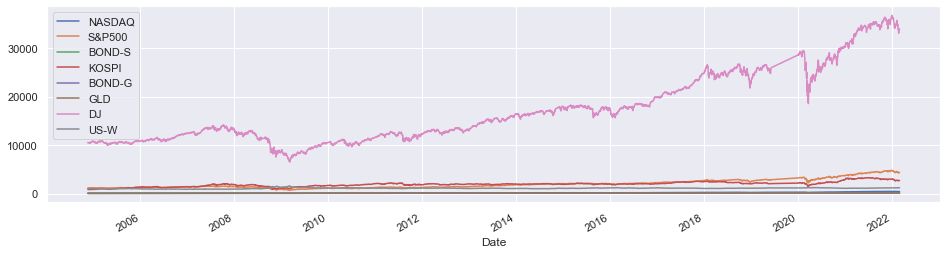

In [ ]:
df.plot(figsize=(16,4))

<AxesSubplot:xlabel='Date'>

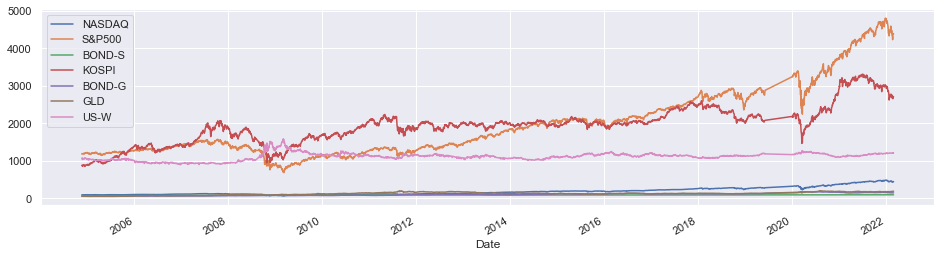

In [ ]:
df[['NASDAQ', 'S&P500', 'BOND-S', 'KOSPI', 'BOND-G', 'GLD', 'US-W']].plot(figsize=(16,4))

<AxesSubplot:xlabel='Date'>

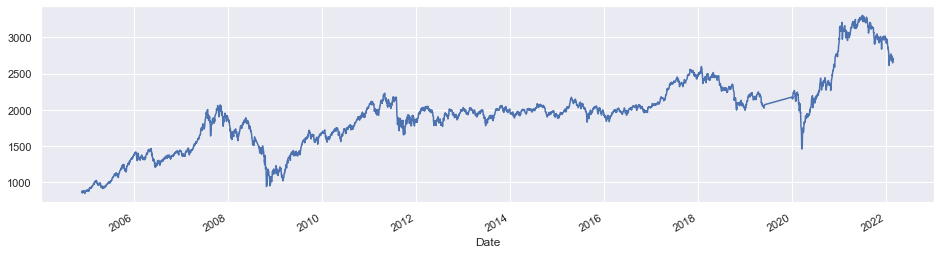

In [ ]:
df['KOSPI'].plot(figsize=(16,4))

<pre>
나쁘다 : 2020~ : 코로나
        2008~2010 : 리먼브라더스파산(서브프라임 MBS모지기채권) - 금융대란 ==> 빅쇼트
        1998 : IMF
    주가하락,  시작통화량급격히증가, 금리인상, 채권가격하락, 개인(매수세)/외인(매도세)
--> 물가인상  : 이자부담, 부동산(매도),  부동산가격(폭락):대출금을못갚을수도있다 -- 대출상환불가 - 은행도산
--> 조기 금리인상 통화정책, 외환보유고 비축금액 줄어든다
횡보 : 2012~2017
